
OBJECTIVE

The objective of this project is to develop a machinelearning model and deploy it as a user-friendly web application that predicts the resale prices of flats in Singapore. This predictive model will be based on historical data of resale flat transactions, and it aims to assist both potential buyers and sellers in estimating the resalevalue of a flat.



**Cleaning the data and training the model**

# supervised learning
# Month,Town,Flat Type,Block,Street_Name,Storey_Range,Floor Area (sqm),Flat Model,Lease Commence Date,Remaining Lease(independent variable)
# Target: Resale Price ---> dependent variable


In [1]:
# Importing the requried libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Reading the csv data as dataframes
df1 = pd.read_csv('/content/Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv')
df2 = pd.read_csv("/content/Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv")
df3 = pd.read_csv("/content/Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv")
df4 = pd.read_csv("/content/Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv")
df5 = pd.read_csv("/content/Resale flat prices based on registration date from Jan-2017 onwards.csv")
df = pd.concat([df1 , df2 , df3, df4, df5],axis=0)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
190719,2024-09,YISHUN,EXECUTIVE,361,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,800000.0,62 years 10 months
190720,2024-09,YISHUN,EXECUTIVE,358,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,900000.0,62 years 10 months
190721,2024-09,YISHUN,EXECUTIVE,606,YISHUN ST 61,01 TO 03,147.0,Apartment,1987,770000.0,62 years 03 months
190722,2024-09,YISHUN,EXECUTIVE,641,YISHUN ST 61,07 TO 09,164.0,Apartment,1992,1068888.0,66 years 10 months


In [11]:
df.columns


Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [12]:
df['month'].max()

'2024-09'

In [13]:
df['month'].min()

'1990-01'

In [14]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [19]:

df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [18]:
# Replace values in 'flat_type' column
df['flat_type'] = df['flat_type'].replace('MULTI-GENERATION', 'MULTI GENERATION')

In [16]:
df['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [21]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE',
       'MODEL A2', 'DBSS', 'TYPE S1', 'TYPE S2', 'PREMIUM APARTMENT LOFT',
       '3GEN'], dtype=object)

In [20]:
# Replace values in 'flat_model' column and convert to uppercase
df['flat_model'] = df['flat_model'].str.upper()

In [22]:
flat_type_count = df['flat_type'].value_counts()
flat_type_count

,count
flat_type,
4 ROOM,356554
3 ROOM,298349
5 ROOM,197745
EXECUTIVE,70303
2 ROOM,12126
1 ROOM,1306
MULTI GENERATION,544


In [23]:
flat_model_count = df['flat_model'].value_counts()
flat_model_count

,count
flat_model,
MODEL A,268954
IMPROVED,244147
NEW GENERATION,190110
SIMPLIFIED,57899
PREMIUM APARTMENT,47848
STANDARD,42771
APARTMENT,35800
MAISONETTE,29920
MODEL A2,10254


## **Handling Null Values**

In [24]:
null_val = (df.isnull().mean()*100).round(2)

In [25]:
pd.DataFrame({
    'column_name':null_val.index,
    'Null_percentage':null_val.values
}).sort_values("Null_percentage",ascending = False)

,column_name,Null_percentage
10,remaining_lease,75.68
0,month,0.00
1,town,0.00
2,flat_type,0.00
3,block,0.00
4,street_name,0.00
5,storey_range,0.00
6,floor_area_sqm,0.00
7,flat_model,0.00
8,lease_commence_date,0.00


In [26]:
# droping remaining_lease missing values of 77%
df = df.dropna()
df.isnull().sum()

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
resale_price,0


In [27]:
df['month'] = pd.to_datetime(df['month'])
df['resale_price'] = df['resale_price'].astype('float')
df['floor_area_sqm'] = df['floor_area_sqm'].astype('float')
df['lease_commence_date'] = df['lease_commence_date'].astype('int64')
df['lease_remain_years'] = 99 - (2024 - df['lease_commence_date'])

df.dropna(inplace=True)

df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years
0,2015-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,IMPROVED,1986,255000.0,70,61
1,2015-01-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,NEW GENERATION,1981,275000.0,65,56
2,2015-01-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,NEW GENERATION,1980,285000.0,64,55
3,2015-01-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,NEW GENERATION,1979,290000.0,63,54
4,2015-01-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,NEW GENERATION,1980,290000.0,64,55
...,...,...,...,...,...,...,...,...,...,...,...,...
190719,2024-09-01,YISHUN,EXECUTIVE,361,YISHUN RING RD,01 TO 03,146.0,MAISONETTE,1988,800000.0,62 years 10 months,63
190720,2024-09-01,YISHUN,EXECUTIVE,358,YISHUN RING RD,01 TO 03,146.0,MAISONETTE,1988,900000.0,62 years 10 months,63
190721,2024-09-01,YISHUN,EXECUTIVE,606,YISHUN ST 61,01 TO 03,147.0,APARTMENT,1987,770000.0,62 years 03 months,62
190722,2024-09-01,YISHUN,EXECUTIVE,641,YISHUN ST 61,07 TO 09,164.0,APARTMENT,1992,1068888.0,66 years 10 months,67


In [28]:
duplicates = df.duplicated()

# Display rows with duplicates
duplicate_rows = df[duplicates]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
            month             town flat_type block         street_name  \
661    2015-01-01  KALLANG/WHAMPOA    3 ROOM    57       GEYLANG BAHRU   
2166   2015-02-01         TAMPINES    3 ROOM   403      TAMPINES ST 41   
3896   2015-04-01            BEDOK    4 ROOM   701  BEDOK RESERVOIR RD   
4246   2015-04-01         CLEMENTI    3 ROOM   714  CLEMENTI WEST ST 2   
5493   2015-05-01            BEDOK    3 ROOM   409     BEDOK NTH AVE 2   
...           ...              ...       ...   ...                 ...   
182040 2024-06-01          PUNGGOL    4 ROOM  671A    EDGEFIELD PLAINS   
186918 2024-08-01          HOUGANG    4 ROOM  997A       BUANGKOK CRES   
187517 2024-08-01          PUNGGOL    4 ROOM  220B         SUMANG LANE   
187733 2024-08-01        SEMBAWANG    4 ROOM  508C   WELLINGTON CIRCLE   
190044 2024-09-01         SENGKANG    3 ROOM  471C         FERNVALE ST   

       storey_range  floor_area_sqm      flat_model  lease_commence_date  \
661        16 TO 18

In [29]:
# Remove duplicate entries and create a new DataFrame
DATA = df.drop_duplicates()

# Display the cleaned DataFrame
print("DataFrame after removing duplicates:")
print(DATA)

DataFrame after removing duplicates:
            month        town  flat_type block        street_name  \
0      2015-01-01  ANG MO KIO     3 ROOM   174   ANG MO KIO AVE 4   
1      2015-01-01  ANG MO KIO     3 ROOM   541  ANG MO KIO AVE 10   
2      2015-01-01  ANG MO KIO     3 ROOM   163   ANG MO KIO AVE 4   
3      2015-01-01  ANG MO KIO     3 ROOM   446  ANG MO KIO AVE 10   
4      2015-01-01  ANG MO KIO     3 ROOM   557  ANG MO KIO AVE 10   
...           ...         ...        ...   ...                ...   
190719 2024-09-01      YISHUN  EXECUTIVE   361     YISHUN RING RD   
190720 2024-09-01      YISHUN  EXECUTIVE   358     YISHUN RING RD   
190721 2024-09-01      YISHUN  EXECUTIVE   606       YISHUN ST 61   
190722 2024-09-01      YISHUN  EXECUTIVE   641       YISHUN ST 61   
190723 2024-09-01      YISHUN  EXECUTIVE   824       YISHUN ST 81   

       storey_range  floor_area_sqm      flat_model  lease_commence_date  \
0          07 TO 09            60.0        IMPROVED       

In [30]:
# Define a function to calculate the median storey level for a given range
def calculate_median_storey(storey_range):
    # Extract the upper and lower limits from the range
    lower_limit, upper_limit = map(int, storey_range.split(' TO '))

    # Calculate the median storey level
    median_storey = (lower_limit + upper_limit) / 2
    return median_storey

# Create a new 'storey_median' column based on 'storey_range'
DATA['storey_median'] = DATA['storey_range'].apply(calculate_median_storey)

## **EDA**

In [31]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227561 entries, 0 to 190723
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                227561 non-null  datetime64[ns]
 1   town                 227561 non-null  object        
 2   flat_type            227561 non-null  object        
 3   block                227561 non-null  object        
 4   street_name          227561 non-null  object        
 5   storey_range         227561 non-null  object        
 6   floor_area_sqm       227561 non-null  float64       
 7   flat_model           227561 non-null  object        
 8   lease_commence_date  227561 non-null  int64         
 9   resale_price         227561 non-null  float64       
 10  remaining_lease      227561 non-null  object        
 11  lease_remain_years   227561 non-null  int64         
 12  storey_median        227561 non-null  float64       
dtypes: datetime64[ns](1

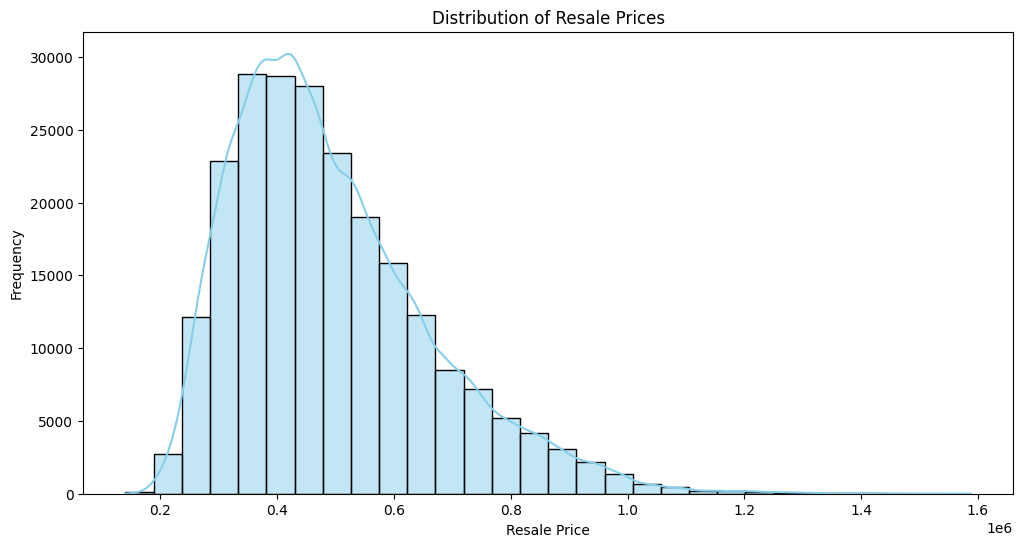

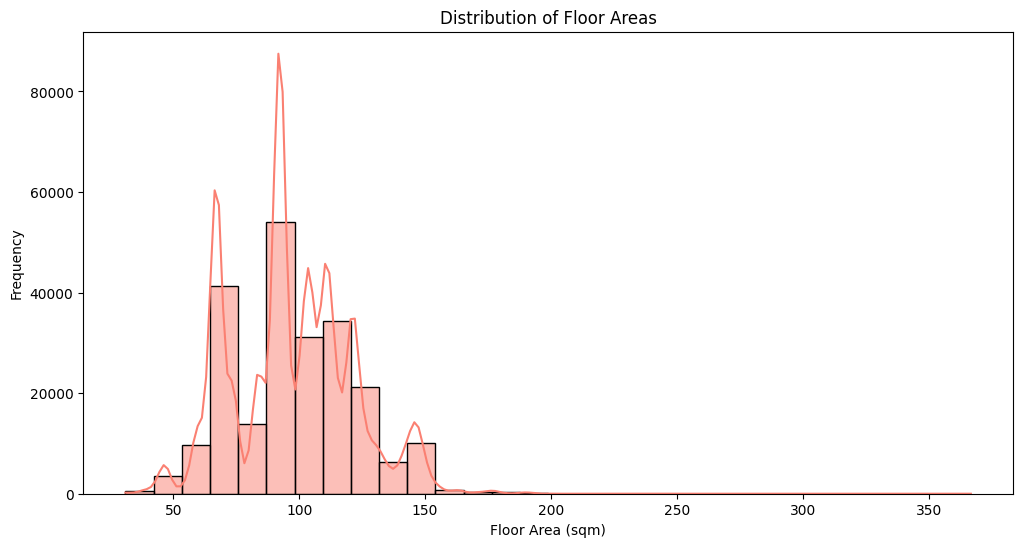

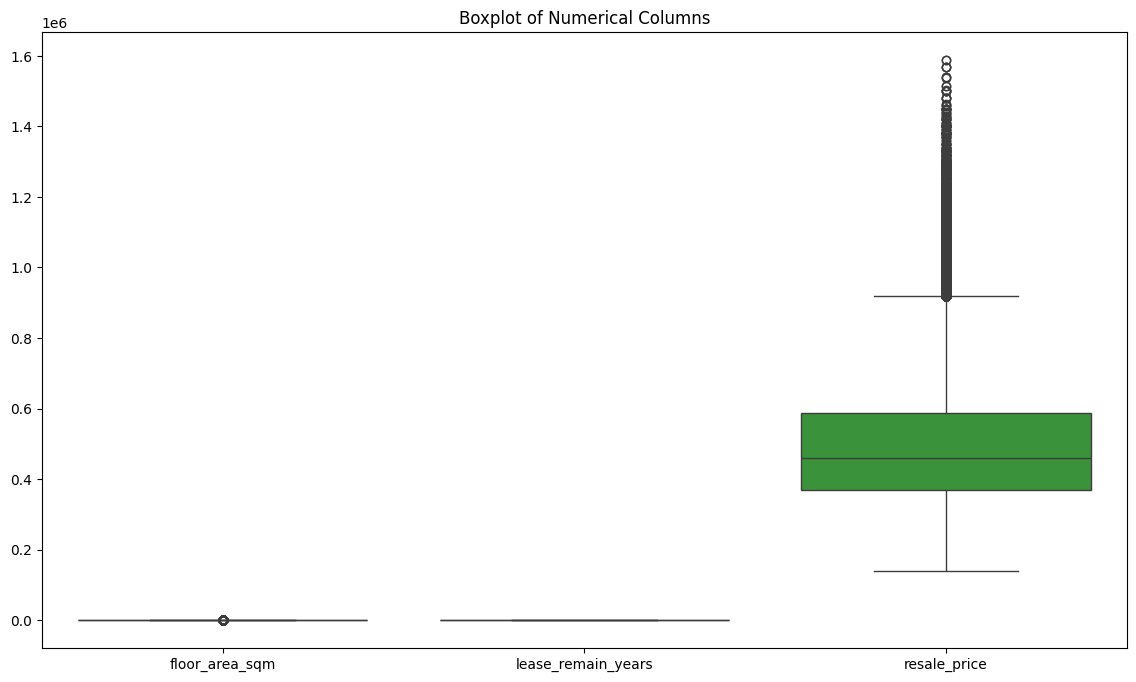

In [32]:
# Assuming your DataFrame

# Plot distribution of resale prices
plt.figure(figsize=(12, 6))
sns.histplot(DATA['resale_price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Resale Prices')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of floor areas
plt.figure(figsize=(12, 6))
sns.histplot(DATA['floor_area_sqm'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Floor Areas')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Frequency')
plt.show()

# Boxplot to visualize distribution of numerical columns
plt.figure(figsize=(14, 8))
sns.boxplot(data=DATA[['floor_area_sqm', 'lease_remain_years', 'resale_price']])
plt.title('Boxplot of Numerical Columns')
plt.show()

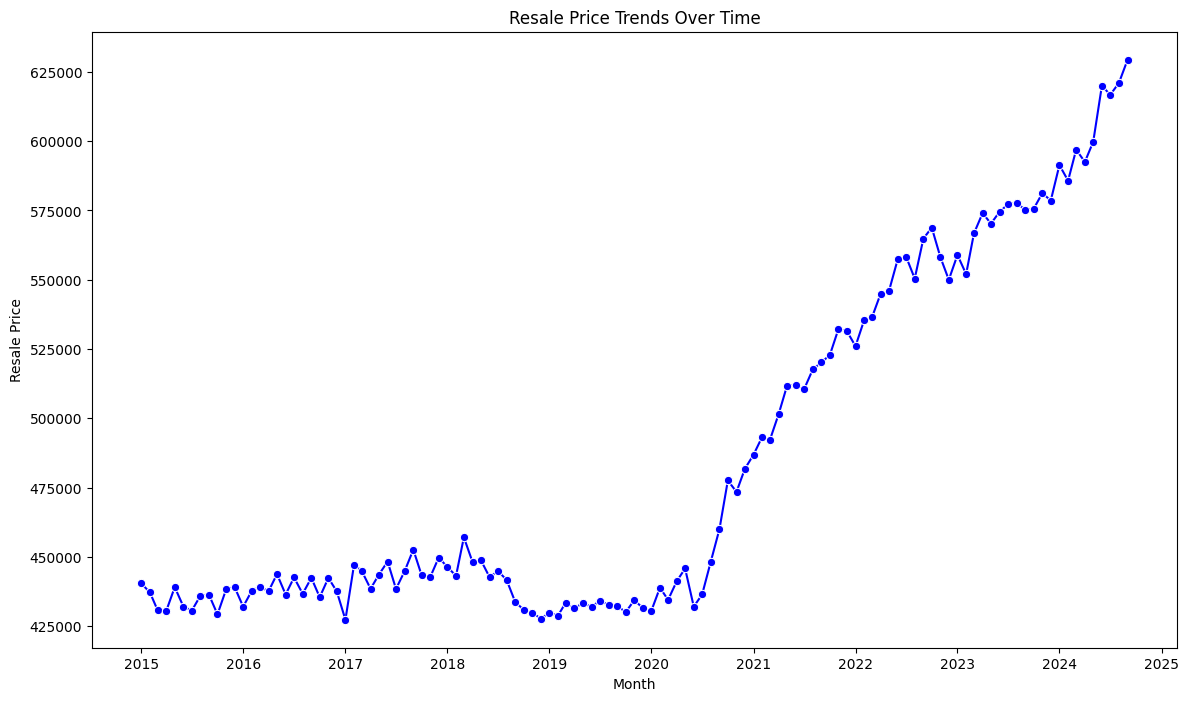

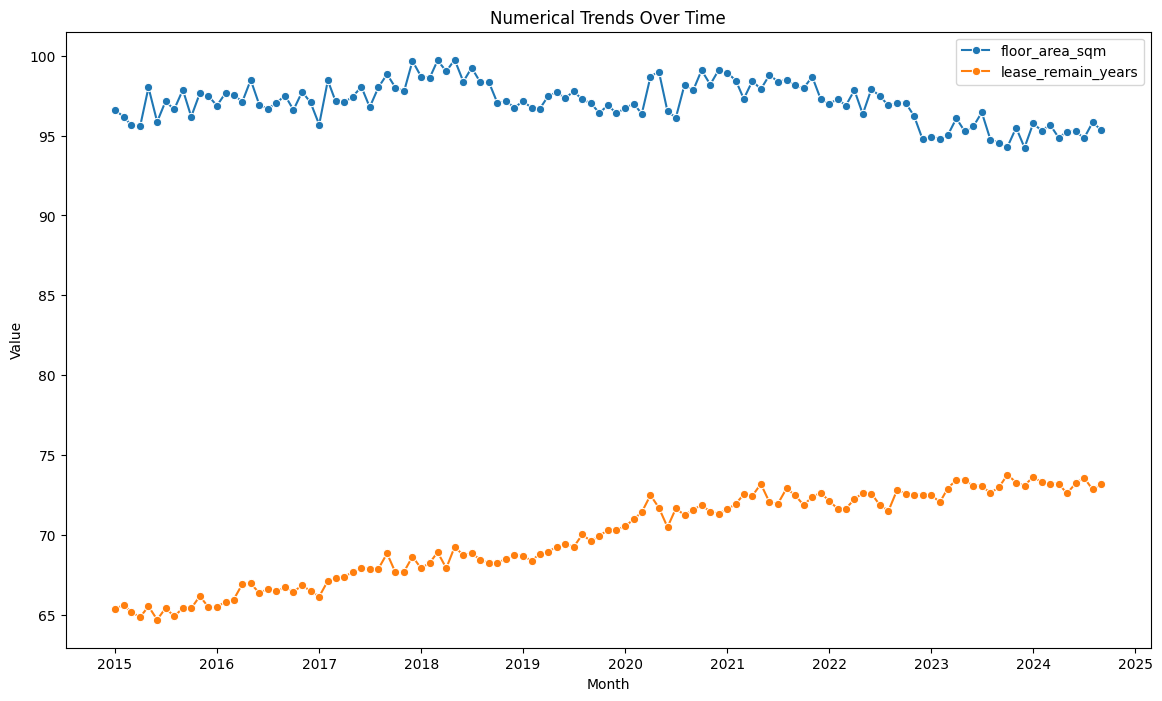

In [33]:


# Assuming your DataFrame

# Convert 'month' column to datetime format
DATA['month'] = pd.to_datetime(DATA['month'])

# Plot trends over time for resale prices
plt.figure(figsize=(14, 8))
sns.lineplot(x='month', y='resale_price', data=DATA, ci=None, marker='o', color='blue')
plt.title('Resale Price Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Resale Price')
plt.show()

# Plot trends over time for other numerical columns
numerical_columns = ['floor_area_sqm', 'lease_remain_years']
plt.figure(figsize=(14, 8))

for column in numerical_columns:
    sns.lineplot(x='month', y=column, data=df, ci=None, marker='o', label=column)

plt.title('Numerical Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.show()


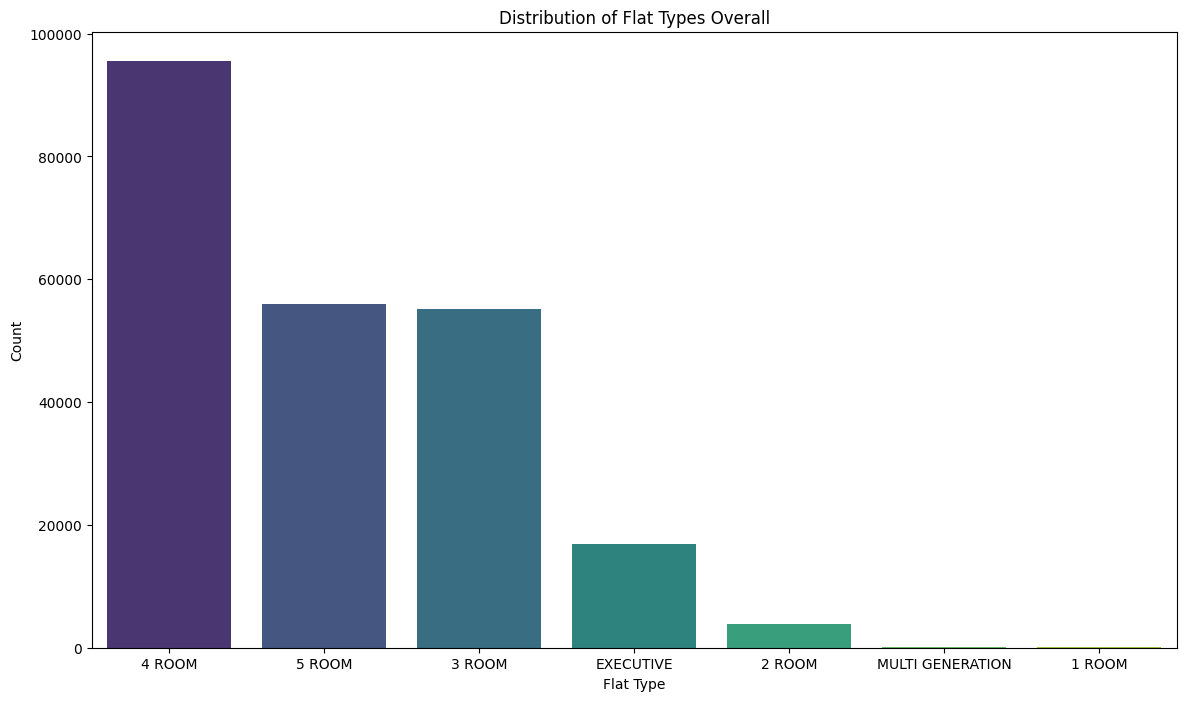

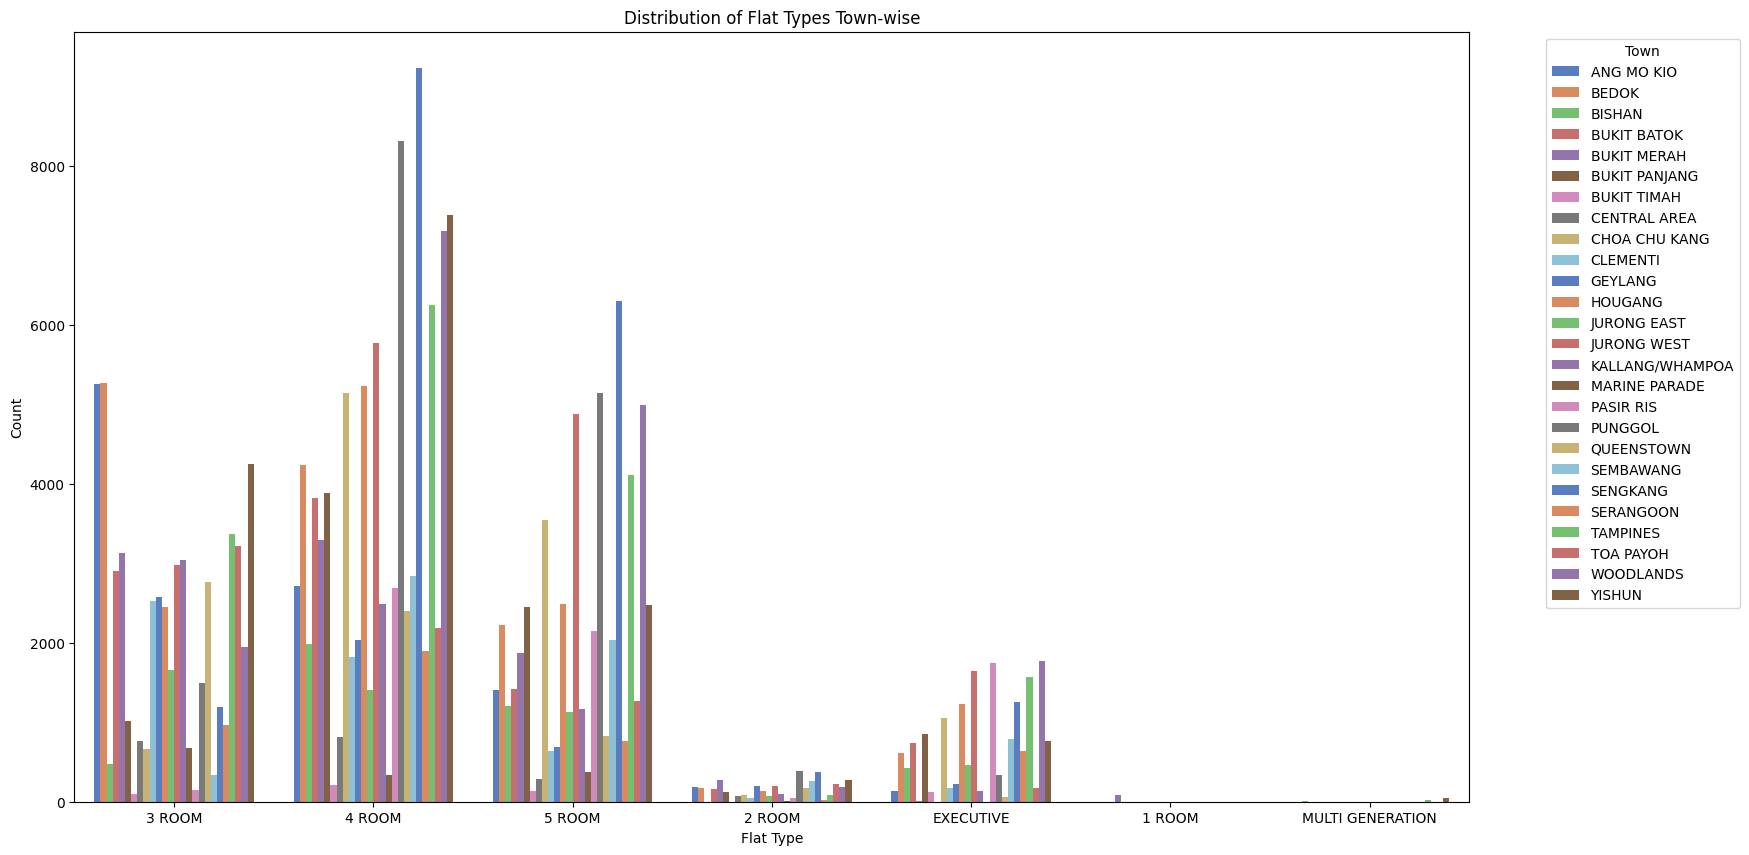

In [34]:
# Countplot of flat types overall
plt.figure(figsize=(14, 8))
sns.countplot(x='flat_type', data=DATA, order=DATA['flat_type'].value_counts().index, palette='viridis')
plt.title('Distribution of Flat Types Overall')
plt.xlabel('Flat Type')
plt.ylabel('Count')
plt.show()

# Countplot of flat types town-wise
plt.figure(figsize=(18, 10))
sns.countplot(x='flat_type', hue='town', data=DATA, palette='muted')
plt.title('Distribution of Flat Types Town-wise')
plt.xlabel('Flat Type')
plt.ylabel('Count')
plt.legend(title='Town', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


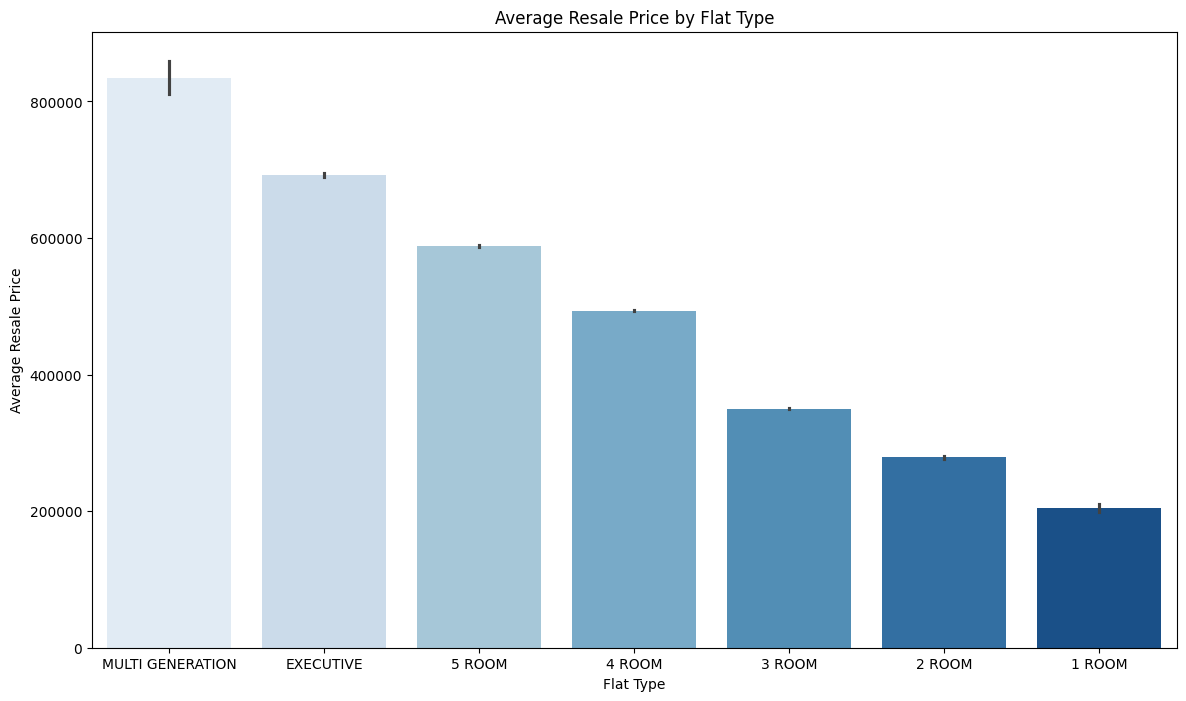

In [35]:


#Calculate and visualize the average resale price for each flat type. This can provide insights into the pricing trends across different types of flats.


plt.figure(figsize=(14, 8))
sns.barplot(x='flat_type', y='resale_price', data=DATA, order=DATA.groupby('flat_type')['resale_price'].mean().sort_values(ascending=False).index, palette='Blues')
plt.title('Average Resale Price by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Average Resale Price')
plt.show()




### **Explore Correlations:**

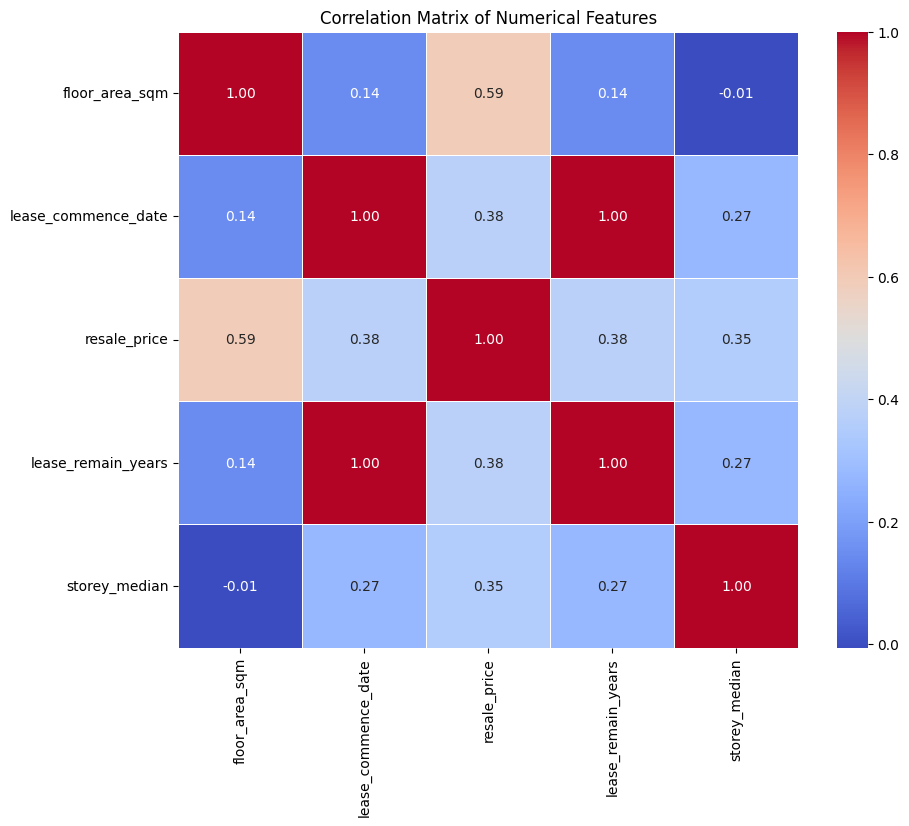

In [36]:


# Check for correlations between different numerical features in your dataset. This can provide insights into the relationships between different variables.


import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns for correlation analysis
numerical_columns = ['floor_area_sqm', 'lease_commence_date', 'resale_price', 'lease_remain_years', 'storey_median']

# Creating a correlation matrix
correlation_matrix = DATA[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()




In [37]:
# Selecting numerical columns for correlation analysis
numerical_columns = ['floor_area_sqm', 'lease_commence_date', 'resale_price', 'lease_remain_years', 'storey_median']

# Creating a correlation matrix
correlation_matrix = DATA[numerical_columns].corr()

# Print correlation coefficients for all pairs of features
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        feature1 = numerical_columns[i]
        feature2 = numerical_columns[j]
        correlation_coefficient = correlation_matrix.loc[feature1, feature2]
        print(f"Correlation between {feature1} and {feature2}: {correlation_coefficient:.2f}")

Correlation between floor_area_sqm and lease_commence_date: 0.14
Correlation between floor_area_sqm and resale_price: 0.59
Correlation between floor_area_sqm and lease_remain_years: 0.14
Correlation between floor_area_sqm and storey_median: -0.01
Correlation between lease_commence_date and resale_price: 0.38
Correlation between lease_commence_date and lease_remain_years: 1.00
Correlation between lease_commence_date and storey_median: 0.27
Correlation between resale_price and lease_remain_years: 0.38
Correlation between resale_price and storey_median: 0.35
Correlation between lease_remain_years and storey_median: 0.27


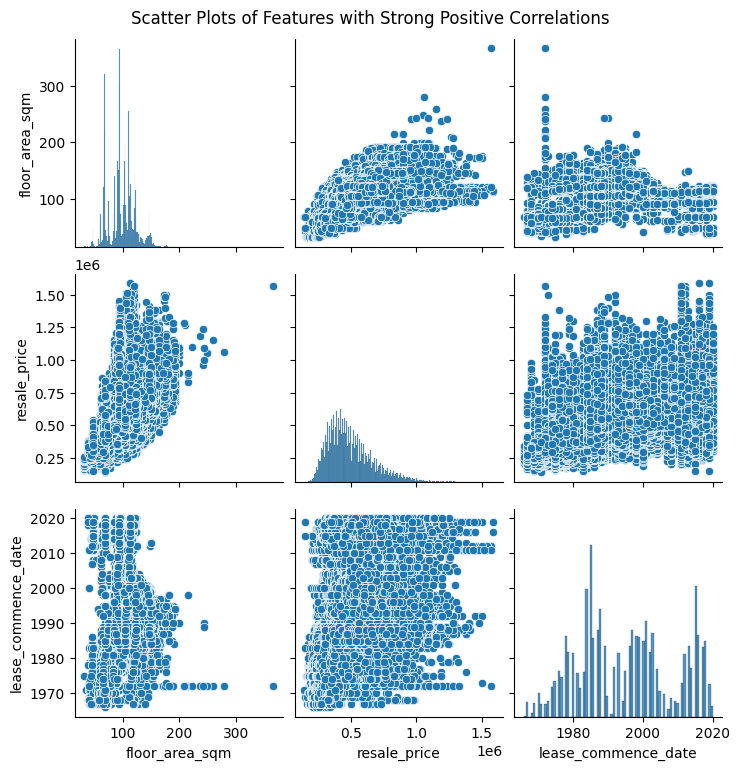

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting features with strong positive correlations
positive_correlations = ['floor_area_sqm', 'resale_price', 'lease_commence_date']

# Creating scatter plots
sns.pairplot(DATA[positive_correlations])
plt.suptitle('Scatter Plots of Features with Strong Positive Correlations', y=1.02)
plt.show()


### **identifying outliers**

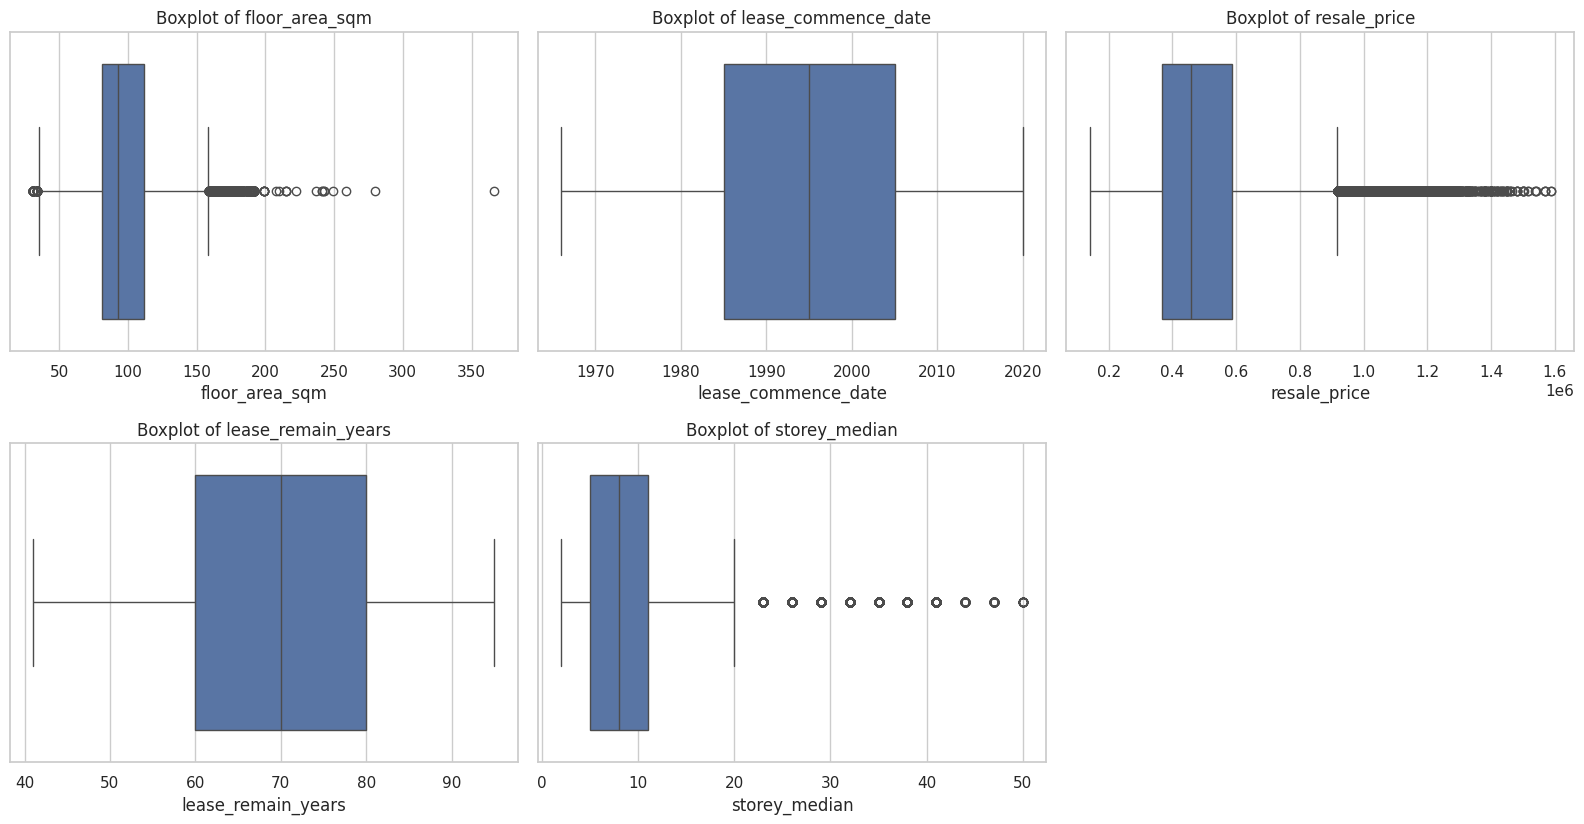

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the numerical columns for outlier detection
numerical_columns = ['floor_area_sqm', 'lease_commence_date', 'resale_price', 'lease_remain_years', 'storey_median']

# Create box plots for each numerical column
plt.figure(figsize=(16, 12))
sns.set(style="whitegrid")

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=DATA[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


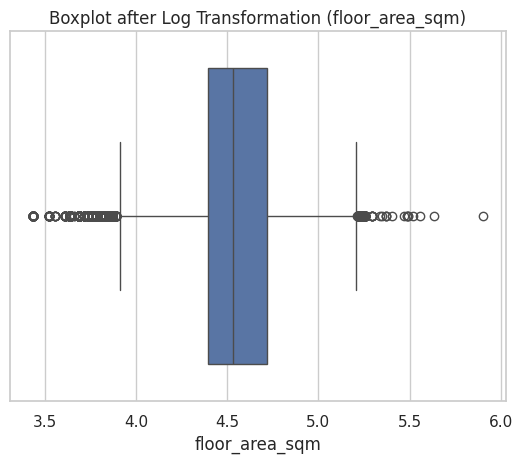

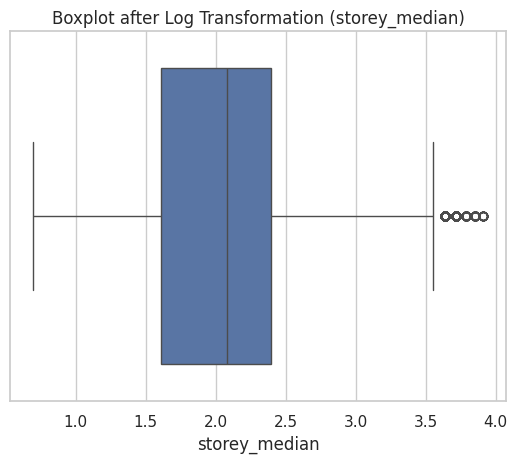

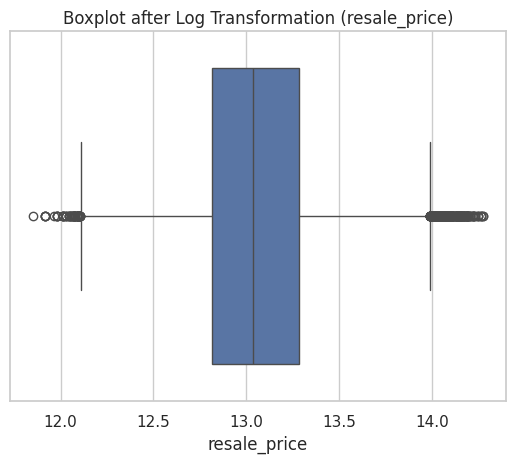

In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Adding a small constant to avoid logarithm of zero or negative values
epsilon = 1e-8

# Logarithmic transformation for selected columns
DATA['floor_area_sqm'] = np.log(DATA['floor_area_sqm'] + epsilon)
sns.boxplot(x='floor_area_sqm', data=DATA)
plt.title('Boxplot after Log Transformation (floor_area_sqm)')
plt.show()

DATA['storey_median'] = np.log(DATA['storey_median'] + epsilon)
sns.boxplot(x='storey_median', data=DATA)
plt.title('Boxplot after Log Transformation (storey_median)')
plt.show()

DATA['resale_price'] = np.log(DATA['resale_price'] + epsilon)
sns.boxplot(x='resale_price', data=DATA)
plt.title('Boxplot after Log Transformation (resale_price)')
plt.show()


### **Data Exploration:**

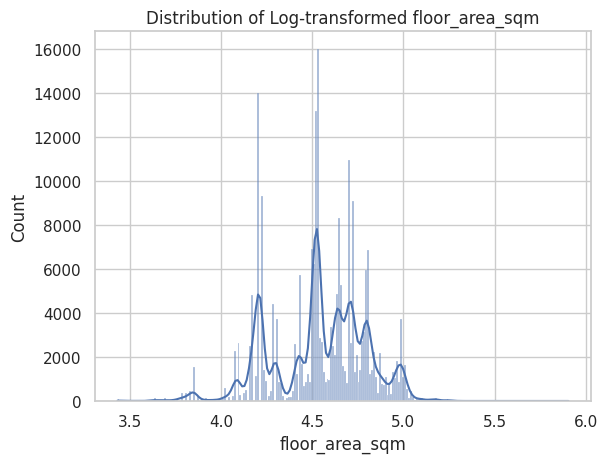

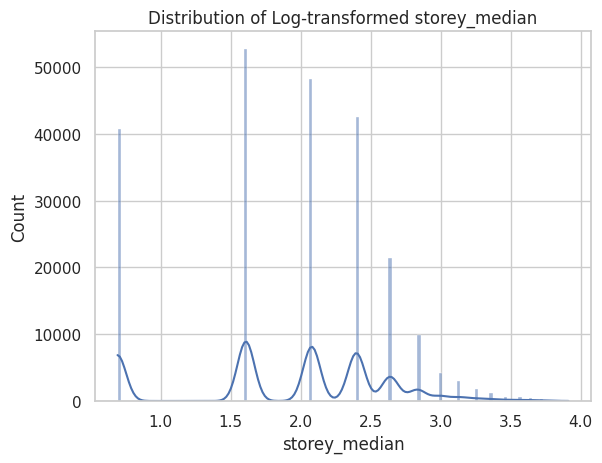

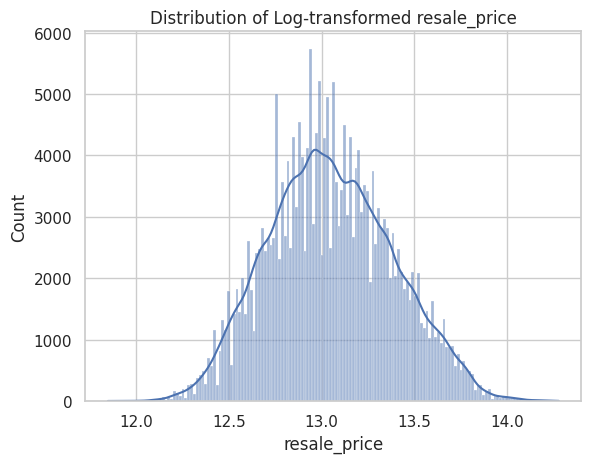

In [41]:


# Visualize the transformed data: Plot histograms or kernel density plots , This will help you assess whether the transformation has addressed the skewness.


sns.histplot(DATA['floor_area_sqm'], kde=True)
plt.title('Distribution of Log-transformed floor_area_sqm')
plt.show()

sns.histplot(DATA['storey_median'], kde=True)
plt.title('Distribution of Log-transformed storey_median')
plt.show()

sns.histplot(DATA['resale_price'], kde=True)
plt.title('Distribution of Log-transformed resale_price')
plt.show()




In [42]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227561 entries, 0 to 190723
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                227561 non-null  datetime64[ns]
 1   town                 227561 non-null  object        
 2   flat_type            227561 non-null  object        
 3   block                227561 non-null  object        
 4   street_name          227561 non-null  object        
 5   storey_range         227561 non-null  object        
 6   floor_area_sqm       227561 non-null  float64       
 7   flat_model           227561 non-null  object        
 8   lease_commence_date  227561 non-null  int64         
 9   resale_price         227561 non-null  float64       
 10  remaining_lease      227561 non-null  object        
 11  lease_remain_years   227561 non-null  int64         
 12  storey_median        227561 non-null  float64       
dtypes: datetime64[ns](1

### **Feature Engineering:**

In [43]:


import pandas as pd

# Assuming DATA is your DataFrame
DATA['month'] = pd.to_datetime(DATA['month'])
DATA['year'] = DATA['month'].dt.year
DATA['month_of_year'] = DATA['month'].dt.month



# Create a binary column for high/low floor:
DATA['high_floor'] = (DATA['storey_range'] == '10 TO 12') | (DATA['storey_range'] == '13 TO 15') | (DATA['storey_range'] == '16 TO 18')

# Calculate price per square meter:
DATA['price_per_sqm'] = DATA['resale_price'] / DATA['floor_area_sqm']





In [44]:
DATA.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years,storey_median,year,month_of_year,high_floor,price_per_sqm
0,2015-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,4.094345,IMPROVED,1986,12.449019,70,61,2.079442,2015,1,False,3.040540
1,2015-01-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,4.219508,NEW GENERATION,1981,12.524526,65,56,0.693147,2015,1,False,2.968244
2,2015-01-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,4.234107,NEW GENERATION,1980,12.560244,64,55,0.693147,2015,1,False,2.966445
3,2015-01-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,4.219508,NEW GENERATION,1979,12.577636,63,54,0.693147,2015,1,False,2.980830
4,2015-01-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,4.219508,NEW GENERATION,1980,12.577636,64,55,2.079442,2015,1,False,2.980830


In [45]:
# Create a binary column for older/newer flats based on lease_commence_date:
current_year = pd.to_datetime('today').year
DATA['is_new'] = (current_year - DATA['lease_commence_date']) < 10

In [46]:
# Convert high_floor to integer where True is 1 and False is 0
DATA['high_floor'] = DATA['high_floor'].astype(int)
DATA['is_new'] = DATA['is_new'].astype(int) # Convert is_new to integer where True is 1 and False is 0

In [47]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227561 entries, 0 to 190723
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                227561 non-null  datetime64[ns]
 1   town                 227561 non-null  object        
 2   flat_type            227561 non-null  object        
 3   block                227561 non-null  object        
 4   street_name          227561 non-null  object        
 5   storey_range         227561 non-null  object        
 6   floor_area_sqm       227561 non-null  float64       
 7   flat_model           227561 non-null  object        
 8   lease_commence_date  227561 non-null  int64         
 9   resale_price         227561 non-null  float64       
 10  remaining_lease      227561 non-null  object        
 11  lease_remain_years   227561 non-null  int64         
 12  storey_median        227561 non-null  float64       
 13  year               

### **Label Encoding for categorical variables:**

In [49]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Transform 'flat_type' column
DATA['flat_type'] = le.fit_transform(DATA['flat_type'])

# Transform 'block' column
DATA['block'] = le.fit_transform(DATA['block'])

# Transform 'street_name' column
DATA['street_name'] = le.fit_transform(DATA['street_name'])

# Transform 'storey_range' column
DATA['storey_range'] = le.fit_transform(DATA['storey_range'])

# Transform 'flat_model' column
DATA['flat_model'] = le.fit_transform(DATA['flat_model'])

# Transform 'town' column
DATA['town'] = le.fit_transform(DATA['town'])

In [50]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227561 entries, 0 to 190723
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                227561 non-null  datetime64[ns]
 1   town                 227561 non-null  int64         
 2   flat_type            227561 non-null  int64         
 3   block                227561 non-null  int64         
 4   street_name          227561 non-null  int64         
 5   storey_range         227561 non-null  int64         
 6   floor_area_sqm       227561 non-null  float64       
 7   flat_model           227561 non-null  int64         
 8   lease_commence_date  227561 non-null  int64         
 9   resale_price         227561 non-null  float64       
 10  remaining_lease      227561 non-null  object        
 11  lease_remain_years   227561 non-null  int64         
 12  storey_median        227561 non-null  float64       
 13  year               

In [55]:
DATA.tail()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years,storey_median,year,month_of_year,high_floor,price_per_sqm,is_new
190719,2024-09-01,25,5,1039,548,0,4.983607,7,1988,13.592367,62 years 10 months,63,0.693147,2024,9,0,2.727416,0
190720,2024-09-01,25,5,1029,548,0,4.983607,7,1988,13.710150,62 years 10 months,63,0.693147,2024,9,0,2.751050,0
190721,2024-09-01,25,5,1755,557,0,4.990433,3,1987,13.554146,62 years 03 months,62,0.693147,2024,9,0,2.716026,0
190722,2024-09-01,25,5,1866,557,2,5.099866,3,1992,13.882129,66 years 10 months,67,2.079442,2024,9,0,2.722057,0
190723,2024-09-01,25,5,2371,560,0,4.983607,7,1987,13.703336,62 years 03 months,62,0.693147,2024,9,0,2.749682,0


In [59]:

# Selecting numerical columns for correlation analysis
numerical_columns = ['town', 'flat_type', 'block', 'street_name', 'storey_range','floor_area_sqm','flat_model','lease_commence_date','resale_price','lease_remain_years','storey_median','year','month_of_year','high_floor','price_per_sqm','is_new']

# Creating a correlation matrix
correlation_matrix = DATA[numerical_columns].corr()


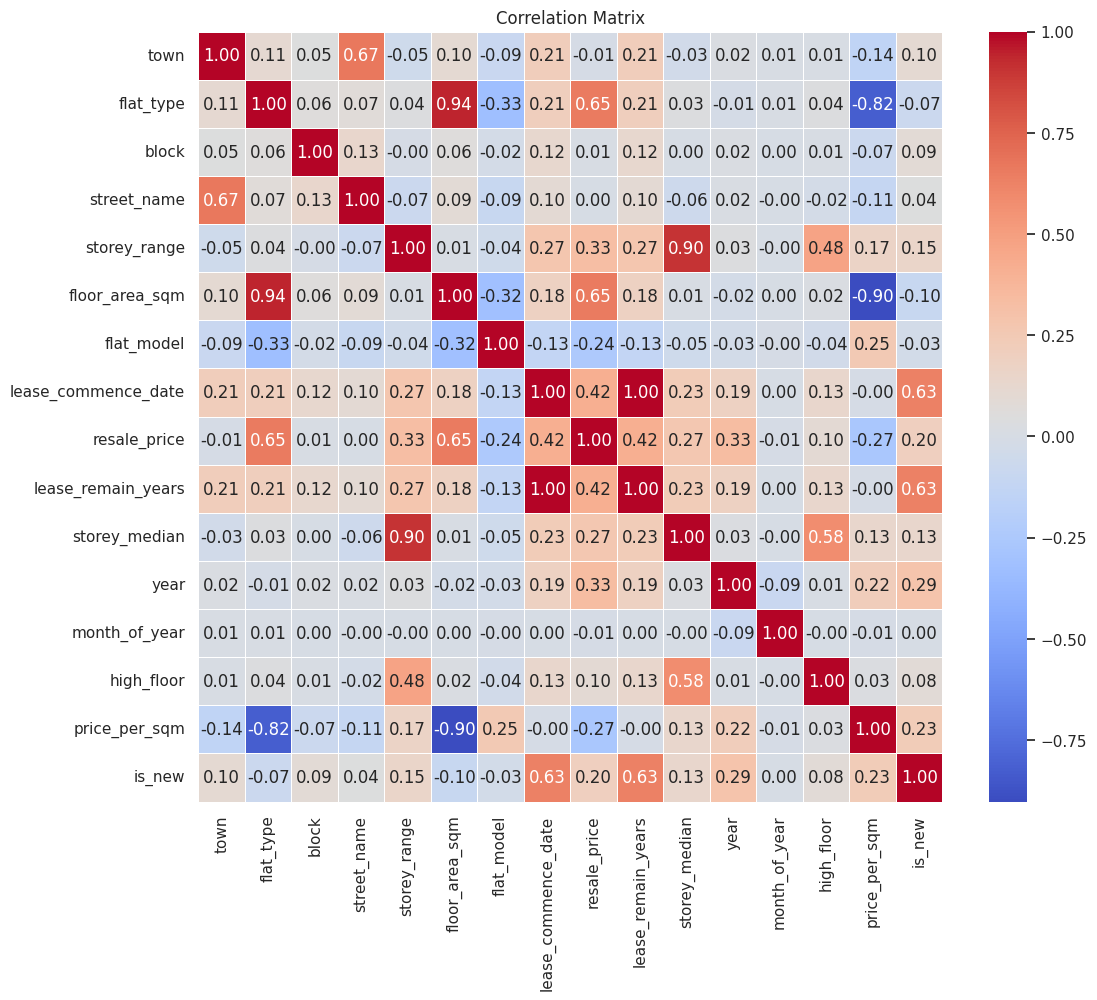

Correlation with 'resale_price':
resale_price           1.000000
floor_area_sqm         0.652096
flat_type              0.652018
lease_remain_years     0.418941
lease_commence_date    0.418941
year                   0.334367
storey_range           0.328356
storey_median          0.266365
is_new                 0.202695
high_floor             0.097575
block                  0.006921
street_name            0.002113
month_of_year         -0.006338
town                  -0.010227
flat_model            -0.244857
price_per_sqm         -0.266624
Name: resale_price, dtype: float64


In [60]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

# Correlation with the target variable ('resale_price')
target_correlation = correlation_matrix['resale_price'].sort_values(ascending=False)
print("Correlation with 'resale_price':")
print(target_correlation)

In [61]:
selected_data = DATA[['floor_area_sqm','flat_type','lease_remain_years','lease_commence_date','storey_range','year','storey_median','is_new','high_floor','flat_model','price_per_sqm','resale_price']]

In [62]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227561 entries, 0 to 190723
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   floor_area_sqm       227561 non-null  float64
 1   flat_type            227561 non-null  int64  
 2   lease_remain_years   227561 non-null  int64  
 3   lease_commence_date  227561 non-null  int64  
 4   storey_range         227561 non-null  int64  
 5   year                 227561 non-null  int32  
 6   storey_median        227561 non-null  float64
 7   is_new               227561 non-null  int64  
 8   high_floor           227561 non-null  int64  
 9   flat_model           227561 non-null  int64  
 10  price_per_sqm        227561 non-null  float64
 11  resale_price         227561 non-null  float64
dtypes: float64(4), int32(1), int64(7)
memory usage: 21.7 MB


In [63]:
# Save the DataFrame with selected columns to a CSV file
selected_data.to_csv('Singapore_Resale_data.csv', index=False)

In [64]:
from IPython.display import FileLink

# Create a download link for the CSV file
FileLink('Singapore_Resale_data.csv')

/content/Singapore_Resale_data.csv

In [65]:
sd =pd.read_csv('Singapore_Resale_data.csv')
sd

,floor_area_sqm,flat_type,lease_remain_years,lease_commence_date,storey_range,year,storey_median,is_new,high_floor,flat_model,price_per_sqm,resale_price
0,4.094345,2,61,1986,2,2015,2.079442,0,0,5,3.040540,12.449019
1,4.219508,2,56,1981,0,2015,0.693147,0,0,12,2.968244,12.524526
2,4.234107,2,55,1980,0,2015,0.693147,0,0,12,2.966445,12.560244
3,4.219508,2,54,1979,0,2015,0.693147,0,0,12,2.980830,12.577636
4,4.219508,2,55,1980,2,2015,2.079442,0,0,12,2.980830,12.577636
...,...,...,...,...,...,...,...,...,...,...,...,...
227556,4.983607,5,63,1988,0,2024,0.693147,0,0,7,2.727416,13.592367
227557,4.983607,5,63,1988,0,2024,0.693147,0,0,7,2.751050,13.710150
227558,4.990433,5,62,1987,0,2024,0.693147,0,0,3,2.716026,13.554146
227559,5.099866,5,67,1992,2,2024,2.079442,0,0,3,2.722057,13.882129


In [66]:
sd.dtypes

,0
floor_area_sqm,float64
flat_type,int64
lease_remain_years,int64
lease_commence_date,int64
storey_range,int64
year,int64
storey_median,float64
is_new,int64
high_floor,int64
flat_model,int64


In [67]:
sd.isnull().sum()

,0
floor_area_sqm,0
flat_type,0
lease_remain_years,0
lease_commence_date,0
storey_range,0
year,0
storey_median,0
is_new,0
high_floor,0
flat_model,0


In [68]:
sd['lease_remain_years'].value_counts()

,count
lease_remain_years,
60,13825
90,10529
59,10295
63,8731
76,7738
62,7015
72,6976
78,6779
91,6596


In [69]:
sd['year'].value_counts()

,count
year,
2021,29057
2022,26702
2023,25741
2020,23313
2019,22168
2024,21562
2018,21552
2017,20337
2016,19363


### **Encoding Data**

In [70]:
from sklearn.preprocessing import StandardScaler

# Extract the features (X) by excluding the target variable
X = selected_data.drop('resale_price', axis=1)

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform the features
X_scaled = scaler.fit_transform(X)

# 'X_scaled' now contains the standardized features


In [71]:
test_dataframe = pd.DataFrame(X)
test_dataframe

,floor_area_sqm,flat_type,lease_remain_years,lease_commence_date,storey_range,year,storey_median,is_new,high_floor,flat_model,price_per_sqm
0,4.094345,2,61,1986,2,2015,2.079442,0,0,5,3.040540
1,4.219508,2,56,1981,0,2015,0.693147,0,0,12,2.968244
2,4.234107,2,55,1980,0,2015,0.693147,0,0,12,2.966445
3,4.219508,2,54,1979,0,2015,0.693147,0,0,12,2.980830
4,4.219508,2,55,1980,2,2015,2.079442,0,0,12,2.980830
...,...,...,...,...,...,...,...,...,...,...,...
190719,4.983607,5,63,1988,0,2024,0.693147,0,0,7,2.727416
190720,4.983607,5,63,1988,0,2024,0.693147,0,0,7,2.751050
190721,4.990433,5,62,1987,0,2024,0.693147,0,0,3,2.716026
190722,5.099866,5,67,1992,2,2024,2.079442,0,0,3,2.722057


### **Splitting the data for training and testing purposes**

In [72]:
from sklearn.model_selection import train_test_split

# Assuming 'selected_data' is your DataFrame
# 'resale_price' is the target variable, and 'X' are the features

# Extract the target variable
y = selected_data['resale_price']

# Drop the target variable from the features
X = selected_data.drop('resale_price', axis=1)

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (182048, 11)
X_test shape: (45513, 11)
y_train shape: (182048,)
y_test shape: (45513,)


### **Decision Tree Regressor**

In [74]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Decision Tree Regressor
DTR = DecisionTreeRegressor()

# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': [1.0, 'sqrt', 'log2']  # Explicitly setting max_features=1.0
}


# gridsearchcv
grid_search = GridSearchCV(estimator=DTR, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print(" ")
print('R-squared:', r2)
score = best_model.score(X_test, y_test)
print('R-squared (using score method):', score)


Best hyperparameters: {'max_depth': 22, 'max_features': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 3}
 
Mean squared error: 6.760702830605362e-05
Mean Absolute Error 0.002083825129296717
Root Mean squared error: 0.008222349317929372
 
R-squared: 0.9993990011342154
R-squared (using score method): 0.9993990011342154


In [75]:


import pickle

# Assuming 'best_model' is the tuned Decision Tree Regressor
with open('Singapore_resale_price.pkl', 'wb') as f:
    pickle.dump(best_model, f)



import pandas as pd
from IPython.display import FileLink


# Create a download link for the pickle file
FileLink('Singapore_resale_price.pkl')




/content/Singapore_resale_price.pkl